# Logistic Regresssion

## Load X,y data from NPZ

Using the function added to *mylib.py* file, it's now easy to grab data and X/y vectors ready to be used for model training and tuning

In [1]:
# Run content of mylib.py file
%run mylib.py

# Load data from NPZ file
#data=loadNpz()
(data, X, y)=loadXy()

Loading 'train' set
  loading  data
     shape: (281, 299, 299, 3) - dtype: float64
  loading  features
     shape: (281, 2048) - dtype: float64
  loading  filenames
     shape: (281,) - dtype: <U46
  loading  labels
     shape: (281,) - dtype: int32


Loading 'test' set
  loading  data
     shape: (51, 299, 299, 3) - dtype: float64
  loading  features
     shape: (51, 2048) - dtype: float64
  loading  filenames
     shape: (51,) - dtype: <U50
  loading  labels
     shape: (51,) - dtype: int32


Loading 'valid' set
  loading  data
     shape: (139, 299, 299, 3) - dtype: float64
  loading  features
     shape: (139, 2048) - dtype: float64
  loading  filenames
     shape: (139,) - dtype: <U30
  loading  labels
     shape: (139,) - dtype: int32


building 'trainX' set
  building  data
     shape: (420, 299, 299, 3) - dtype: float64
  building  features
     shape: (420, 2048) - dtype: float64
  building  filenames
     shape: (420,) - dtype: <U46
  building  labels
     shape: (420,) - dt

## Evaluate without any hyperparameters tuning

To do so, I will simply create a LogisticRegression estimator object using default parameters, fit it, and evaluate it agains the *test* dataset.

> Note: I've explicitly set some hyperparameters to avoid warnings about default values that will be changed in the future.


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Cross Validation K-Fold dimension
CV=5

lr=LogisticRegression()

grid_param={
    'multi_class': ['auto'],
    'C': [1.0],
    'solver': ['lbfgs'],
    'max_iter': [1000]
}



grid_lr=GridSearchCV(lr, grid_param, cv=CV, refit=True, return_train_score=True, verbose=True, n_jobs=-1, iid=True)

grid_lr.fit(X['trainX'], y['trainX'])

accuracy_lr=grid_lr.score(X['test'], y['test'])*100

print("LogisticRegression score : {:.1f}%".format(accuracy_lr))


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.8s finished


LogisticRegression score : 96.1%


## Do some hyperparameters tuning with GridSearchCV

In [56]:

lr=LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=10000)

grid_param={
    'multi_class': ['ovr', 'auto'],
    'C': np.logspace(-4, 4, num=10),
    'solver': ['sag', 'saga', 'lbfgs', 'liblinear'],
    'max_iter': [1000],
}

grid_param={
    'C': np.logspace(-4, 4, num=10),
    'max_iter': [1000],
}

grid_lr=GridSearchCV(lr, grid_param, cv=CV, refit=True, return_train_score=True, verbose=True, n_jobs=-1, iid=True)

grid_lr.fit(X['trainX'], y['trainX'])




Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   24.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([1.00000e-04, 7.74264e-04, 5.99484e-03, 4.64159e-02, 3.59381e-01,
       2.78256e+00, 2.15443e+01, 1.66810e+02, 1.29155e+03, 1.00000e+04]), 'max_iter': [1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)

In [58]:
import pandas as pd

columns=['param_solver', 'param_multi_class', 'param_C', 'mean_test_score', 'std_test_score', 'mean_train_score']
pd.DataFrame(grid_lr.cv_results_).sort_values('mean_test_score', ascending=False)[columns].head(20)




KeyError: "['param_solver', 'param_multi_class'] not in index"

In [5]:
best_lr=grid_lr.best_estimator_

best_accuracy_lr=best_lr.score(X['test'], y['test'])*100

print("LogisticRegression score : {:.1f}%".format(best_accuracy_lr))



LogisticRegression score : 96.1%


In [6]:
saveModel(best_lr, 'logistic')

Saving model logistic to model-logistic.sav


## Compute probability

Image index selected from the 'test' dataset [3, 5, 10, 15, 20, 7, 12, 17, 22, 8]


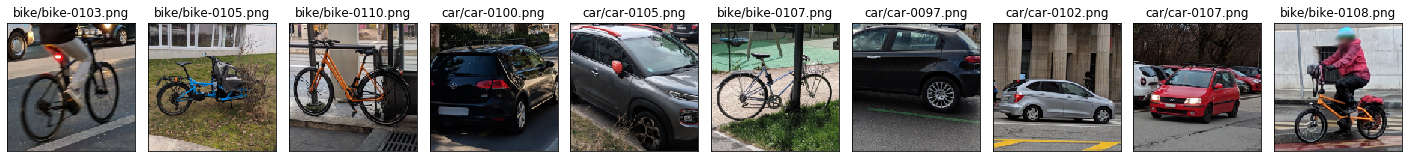

,bike,car,motorcycle,other,truck,van,labels
0,0.996217,0.002226,0.000317,0.001023,0.000156,0.000060,bike/bike-0103.png
1,0.963934,0.002435,0.026385,0.003171,0.003526,0.000549,bike/bike-0105.png
2,0.999133,0.000239,0.000053,0.000446,0.000047,0.000081,bike/bike-0110.png
3,0.000218,0.998891,0.000084,0.000296,0.000013,0.000498,car/car-0100.png
4,0.000259,0.998096,0.000076,0.000364,0.000023,0.001181,car/car-0105.png
5,0.997040,0.000133,0.000072,0.002671,0.000040,0.000045,bike/bike-0107.png
6,0.000188,0.999129,0.000198,0.000236,0.000045,0.000204,car/car-0097.png
7,0.000196,0.997812,0.000152,0.000130,0.000026,0.001684,car/car-0102.png
8,0.001632,0.986580,0.000922,0.001520,0.002179,0.007167,car/car-0107.png
9,0.998255,0.000037,0.001352,0.000295,0.000054,0.000008,bike/bike-0108.png


In [52]:
import matplotlib.pyplot as plt

# Select images from trainX dataset
idx=[x*10 for x in range(10)]
idx=[3, 5, 10, 15, 20, 7, 12, 17, 22, 8]
print("Image index selected from the 'test' dataset",idx)

X_feature=X['test'][idx]
X_data=data['test']['data'][idx]
X_filenames=data['test']['filenames'][idx]

# Create a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=len(X_data), figsize=(25, 10))

# Remove gaps between suplots
plt.subplots_adjust(wspace=0.1, hspace=0)

for i in range(0,len(X_data)):
    axes[i].imshow(np.array(X_data[i]*255, dtype=np.uint8))
    axes[i].get_xaxis().set_visible(False) # disable x-axis
    axes[i].get_yaxis().set_visible(False) # disable y-axis
    axes[i].set_title(X_filenames[i])
plt.show()


proba_df=pd.DataFrame(best_lr.predict_proba(X_feature), columns=data['class_name'])

proba_df['labels']=X_filenames
proba_df

